# Name: Gaurav Marathe
# Roll No.: 45046

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, recall_score,accuracy_score,precision_score

In [3]:
dataset = pd.read_csv("creditcard.csv")

In [4]:
print("Any nulls in the dataset",dataset.isnull().values.any())
print('-------------')

Any nulls in the dataset False
-------------


In [5]:
print('No. of unique labels',len(dataset['Class'].unique()))

No. of unique labels 2


In [6]:
print('label values', dataset.Class.unique())

label values [0 1]


In [7]:
print('-------------')

-------------


In [8]:
print('Break down of Normal and Fraud Transactions')
print(pd.value_counts(dataset['Class'],sort=True))

Break down of Normal and Fraud Transactions
Class
0    284315
1       492
Name: count, dtype: int64


C:\Users\Gaurav\AppData\Local\Temp\ipykernel_27268\533230253.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(pd.value_counts(dataset['Class'],sort=True))


#visualizing the imbalanced dataset

C:\Users\Gaurav\AppData\Local\Temp\ipykernel_27268\3164720620.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(dataset['Class'],sort=True)


Text(0, 0.5, 'Number of Observations')

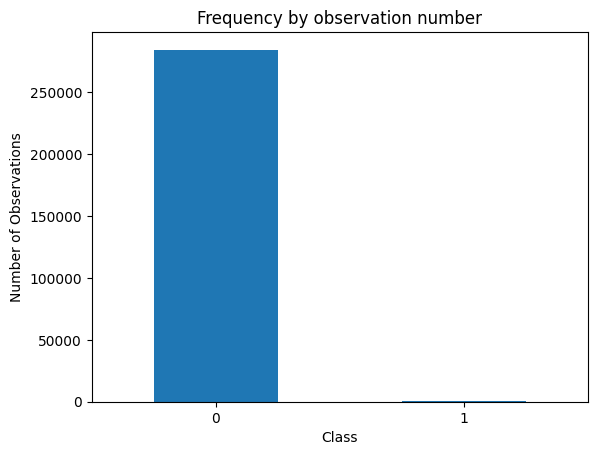

In [9]:
count_classes = pd.value_counts(dataset['Class'],sort=True)
count_classes.plot(kind='bar',rot=0)
plt.xticks(range(len(dataset['Class'].unique())),dataset.Class.unique())
plt.title('Frequency by observation number')
plt.xlabel('Class')
plt.ylabel('Number of Observations')

#Save the normal and fradulent transcations in seperate dataframe

In [10]:
normal_dataset = dataset[dataset.Class == 0]
fraud_dataset = dataset[dataset.Class == 1]

#Visualize transcation amounts for normal and fraudulent transcations

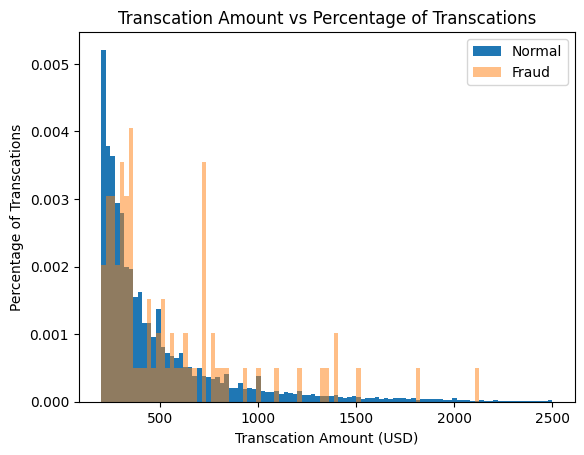

In [11]:
bins = np.linspace(200,2500,100)
plt.hist(normal_dataset.Amount,bins=bins,alpha=1,density=True,label='Normal')
plt.hist(fraud_dataset.Amount,bins=bins,alpha=0.5,density=True,label='Fraud')
plt.legend(loc='upper right')
plt.title('Transcation Amount vs Percentage of Transcations')
plt.xlabel('Transcation Amount (USD)')
plt.ylabel('Percentage of Transcations')
plt.show()

In [12]:
sc = StandardScaler()
dataset['Time'] = sc.fit_transform(dataset['Time'].values.reshape(-1,1))
dataset['Amount'] = sc.fit_transform(dataset['Amount'].values.reshape(-1,1))

raw_data = dataset.values

#The last element contains if the transcation is normal which is represented by 0 and if fraud then 1
labels = raw_data[:,-1]

In [13]:
#The other data points are the electrocadriogram data

data = raw_data[:,0:-1]

train_data,test_data,train_labels,test_labels = train_test_split(data,labels,test_size =
0.2,random_state =2021)

min_val = tf.reduce_min(train_data)
max_val = tf.reduce_max(train_data)

train_data = (train_data - min_val) / (max_val - min_val)
test_data = (test_data - min_val) / (max_val - min_val)

train_data = tf.cast(train_data,tf.float32)
test_data = tf.cast(test_data,tf.float32)

train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)

In [14]:
#Creating normal and fraud datasets

normal_train_data = train_data[~train_labels]
normal_test_data = test_data[~test_labels]

fraud_train_data = train_data[train_labels]
fraud_test_data = test_data[test_labels]
print('No. of records in Fraud Train Data=',len(fraud_train_data))
print('No. of records in Normal Train Data',len(normal_train_data))
print('No. of records in Fraud Test Data=',len(fraud_test_data))
print('No. of records in Normal Test Data=',len(normal_test_data))



No. of records in Fraud Train Data= 389
No. of records in Normal Train Data 227456
No. of records in Fraud Test Data= 103
No. of records in Normal Test Data= 56859


In [15]:
nb_epoch = 50
batch_size = 64
input_dim = normal_train_data.shape[1]
#num of columns,30
encoding_dim = 14
hidden_dim1 = int(encoding_dim / 2)
hidden_dim2 = 4
learning_rate = 1e-7

In [16]:
#input layer
input_layer = tf.keras.layers.Input(shape=(input_dim,))

c. ENCODER CONVERTS IT INTO LATENT REPRESENTATION

In [17]:
#Encoder
encoder = tf.keras.layers.Dense(encoding_dim,activation="tanh",activity_regularizer =
tf.keras.regularizers.l2(learning_rate))(input_layer)

encoder = tf.keras.layers.Dropout(0.2)(encoder)
encoder = tf.keras.layers.Dense(hidden_dim1,activation='relu')(encoder)
encoder = tf.keras.layers.Dense(hidden_dim2,activation=tf.nn.leaky_relu)(encoder)

d. DECODER NETWORKS CONVERT IT BACK TO THE ORIGINAL INPUT -&gt;

In [18]:
#Decoder
decoder = tf.keras.layers.Dense(hidden_dim1,activation='relu')(encoder)
decoder = tf.keras.layers.Dropout(0.2)(decoder)
decoder = tf.keras.layers.Dense(encoding_dim,activation='relu')(decoder)
decoder = tf.keras.layers.Dense(input_dim,activation='tanh')(decoder)

In [19]:
#Autoencoder
autoencoder = tf.keras.Model(inputs = input_layer,outputs = decoder)
autoencoder.summary()

cp = tf.keras.callbacks.ModelCheckpoint(filepath='autoencoder_fraud.h5',mode='min',monitor='val_loss',verbose=2,save_best_only=True)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 30)]              0         
                                                                 
 dense (Dense)               (None, 14)                434       
                                                                 
 dropout (Dropout)           (None, 14)                0         
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dense_2 (Dense)             (None, 4)                 32        
                                                                 
 dense_3 (Dense)             (None, 7)                 35        
                                                                 
 dropout_1 (Dropout)         (None, 7)                 0     

In [20]:
#Define our early stopping
early_stop = tf.keras.callbacks.EarlyStopping(
monitor='val_loss',
min_delta=0.0001,
patience=10,
verbose=11,
mode='min',
restore_best_weights=True

)

 e. COMPILE THE MODEL WITH OPTIMIZER, LOSS, AND EVALUATION METRICS -&gt;

Epoch 1/50
3551/3554 [============================>.] - ETA: 0s - loss: 0.0039 - accuracy: 0.0577
Epoch 1: val_loss improved from inf to 0.00008, saving model to autoencoder_fraud.h5
3554/3554 [==============================] - 7s 2ms/step - loss: 0.0039 - accuracy: 0.0577 - val_loss: 8.2332e-05 - val_accuracy: 0.0251
Epoch 2/50
3542/3554 [============================>.] - ETA: 0s - loss: 1.9340e-05 - accuracy: 0.0692
Epoch 2: val_loss improved from 0.00008 to 0.00007, saving model to autoencoder_fraud.h5
3554/3554 [==============================] - 6s 2ms/step - loss: 1.9329e-05 - accuracy: 0.0694 - val_loss: 7.0594e-05 - val_accuracy: 0.0251
Epoch 3/50
3542/3554 [============================>.] - ETA: 0s - loss: 1.9068e-05 - accuracy: 0.0930
Epoch 3: val_loss improved from 0.00007 to 0.00005, saving model to autoencoder_fraud.h5
3554/3554 [==============================] - 7s 2ms/step - loss: 1.9061e-05 - accuracy: 0.0929 - val_loss: 4.8675e-05 - val_accuracy: 0.0251
Epoch 4/50
3552/

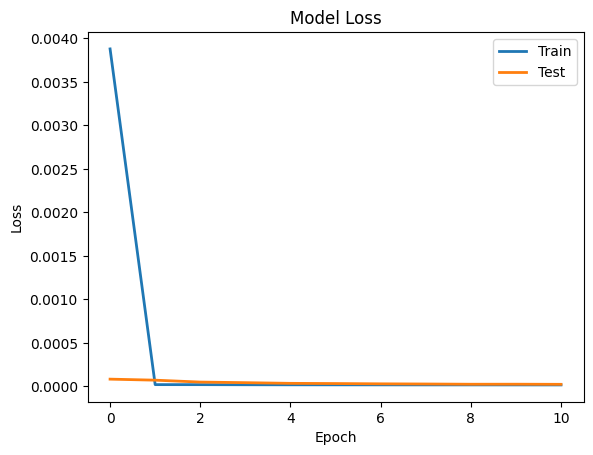

In [21]:
autoencoder.compile(metrics=['accuracy'],loss= 'mean_squared_error',optimizer='adam')

history = autoencoder.fit(normal_train_data,normal_train_data,epochs = nb_epoch,
batch_size = batch_size,shuffle = True,
validation_data = (test_data,test_data),
verbose=1,
callbacks = [cp,early_stop]).history

plt.plot(history['loss'],linewidth = 2,label = 'Train')
plt.plot(history['val_loss'],linewidth = 2,label = 'Test')
plt.legend(loc='upper right')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

#plt.ylim(ymin=0.70,ymax=1)

plt.show()

1781/1781 [==============================] - 2s 908us/step


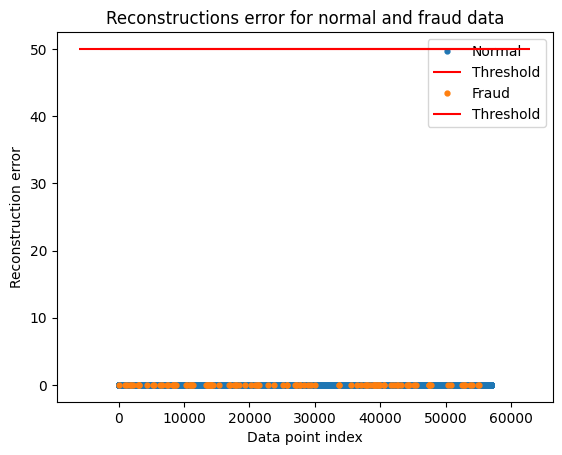

In [22]:
test_x_predictions = autoencoder.predict(test_data)
mse = np.mean(np.power(test_data - test_x_predictions, 2),axis = 1)
error_df = pd.DataFrame({'Reconstruction_error':mse,'True_class':test_labels})

threshold_fixed = 50
groups = error_df.groupby('True_class')
fig,ax = plt.subplots()

for name,group in groups:
    ax.plot(group.index,group.Reconstruction_error,marker='o',ms = 3.5,linestyle='',label = 'Fraud' if name==1 else 'Normal')
    ax.hlines(threshold_fixed,ax.get_xlim()[0],ax.get_xlim()[1],colors='r',zorder=100,label='Threshold')
    ax.legend()
    plt.title('Reconstructions error for normal and fraud data')
    plt.ylabel('Reconstruction error')
    plt.xlabel('Data point index')
plt.show()

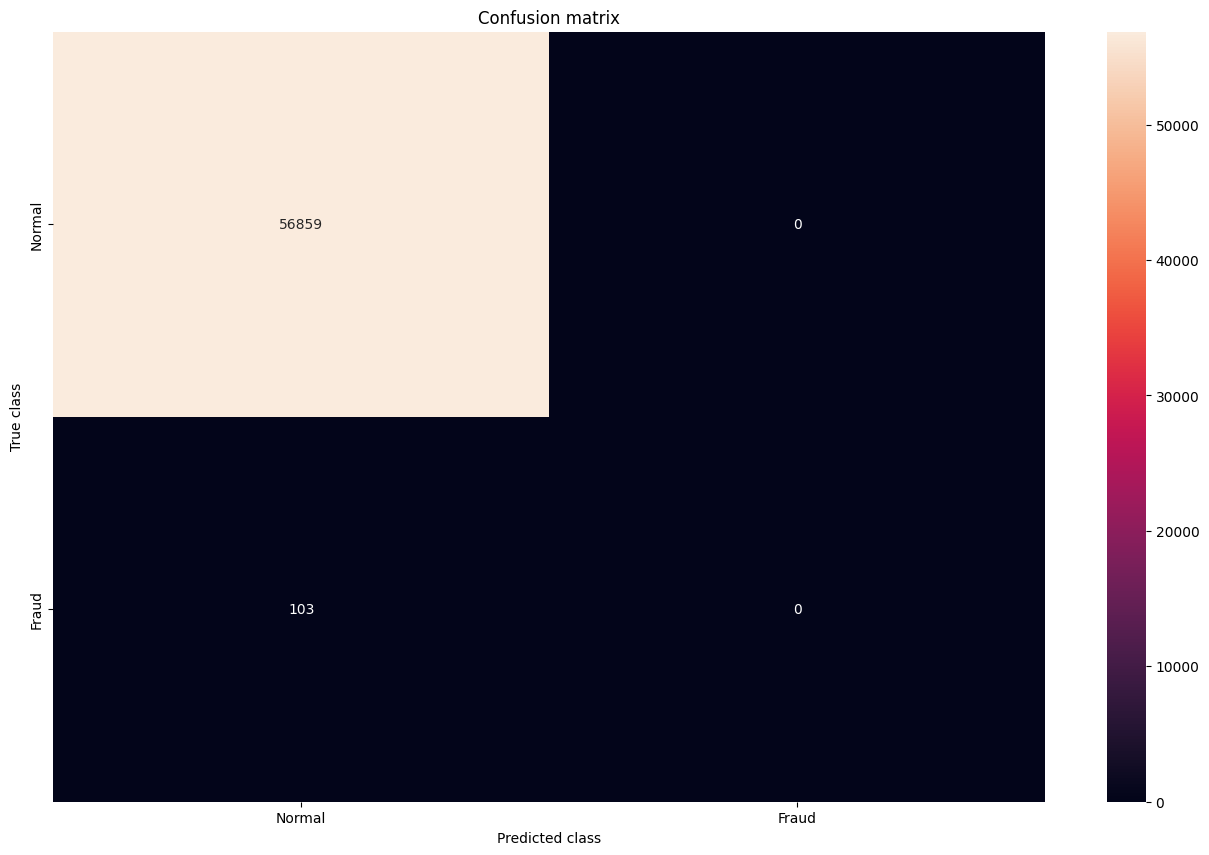

In [23]:
LABELS = ['Normal','Fraud']
threshold_fixed = 52
pred_y = [1 if e > threshold_fixed else 0 for e in error_df.Reconstruction_error.values]
error_df['pred'] = pred_y
conf_matrix = confusion_matrix(error_df.True_class,pred_y)

plt.figure(figsize = (16,10))
sns.heatmap(conf_matrix,xticklabels = LABELS,yticklabels = LABELS,annot = True,fmt='d')
plt.title('Confusion matrix')
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [24]:
print('Accuracy :',accuracy_score(error_df['True_class'],error_df['pred']))

Accuracy : 0.9981917769741231
